In [2]:
import pandas as pd
import numpy as np
from constants_grav import hc, Gentc2, letr
from def_potenciales import f
import plots_jordi as pts

In [20]:
dirfits = '/home/jordi/The_universal_rotation_curve_of_dwarf_disk_galaxies/Fits/'
print('--------------dwarf_disk_galaxies---------------------')
print('------------------------------------------------------')
print('name \t rChi \t AIC \t BIC \t mu \t errmu \t M_d')
ID = 'core'
stat = pd.read_pickle('%sgauss/fitstat_%s.pkl'%(dirfits, ID)) 
statp = pd.read_pickle('%sgauss/fitparamsstat_%s.pkl'%(dirfits, ID))
Mc = statp['value'][1]
Md = statp['value'][2]
Rc = statp['value'][3]
ad = statp['value'][4]
#print(statp)
mu = np.sqrt(1/(Gentc2*Rc*f(Rc, Mc, Rc)))
Rc1, Mc1, _ = np.load('%sgauss/unsigma_nsol1000_%s.npy'%(dirfits, ID))
mu1 = np.sqrt(1/(Gentc2*Rc1*f(Rc1, Mc1, Rc1)))
print('core \t %.1f \t %.1f \t %.1f \t %.2f \t %.2f \t %.2f'%(stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu*hc*1e24, mu1*hc*1e24, Md*1e3))

print('------------------LSB galaxies------------------------')
for nbin in range(1,4,1):
    dirfits = '/home/jordi/LSB_galaxies/URC/Fits/bin%d/'%nbin

    print('------------------ bin %d------------------------------'%nbin)
    dirfitscore = '/home/jordi/LSB_galaxies/URC/Fits_gauss/bin%d/'%nbin
    ID = 'MCMC_core_vbin%d'%nbin
    stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfitscore, ID)) 
    statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfitscore, ID))
    #print(statp)
    Mc = statp['value'][0]
    Md = statp['value'][1]
    Rc = statp['value'][2]
    ad = statp['value'][3]
    mu = np.sqrt(1/(Gentc2*Rc*f(Rc, Mc, Rc)))
    Rc1, Mc1, _ = np.load('%sunsigma_nsol%d_%s.npy'%(dirfitscore, nbin, ID))
    mu1 = np.sqrt(1/(Gentc2*Rc1*f(Rc1, Mc1, Rc1)))
    print('core \t %.1f \t %.1f \t %.1f \t %.2f \t %.2f \t %.2f'%(stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu*hc*1e24, mu1*hc*1e24, Md*1e3))


--------------dwarf_disk_galaxies---------------------
------------------------------------------------------
name 	 rChi 	 AIC 	 BIC 	 mu 	 errmu 	 M_d
core 	 1.6 	 9.5 	 11.4 	 17.43 	 375.36 	 12.00
------------------LSB galaxies------------------------
------------------ bin 1------------------------------
core 	 1.3 	 6.1 	 7.6 	 7.30 	 54.74 	 63.50
------------------ bin 2------------------------------
core 	 1.2 	 4.1 	 5.3 	 2.10 	 8.95 	 411.71
------------------ bin 3------------------------------
core 	 0.2 	 -17.4 	 -16.0 	 1.20 	 8.59 	 1381.48


In [4]:
MU = []; MU2=[]; AD = []
DMU = []
NCOR = []
dirfits = '/home/jordi/The_universal_rotation_curve_of_dwarf_disk_galaxies/Fits/'
print('--------------dwarf_disk_galaxies---------------------')
print('------------------------------------------------------')
print('name \t rChi \t AIC \t BIC \t mu \t errmu \t mu- \t mu+')
ID = 'core'
stat = pd.read_pickle('%sgauss/fitstat_%s.pkl'%(dirfits, ID)) 
statp = pd.read_pickle('%sgauss/fitparamsstat_%s.pkl'%(dirfits, ID))

Mc = statp['value'][1]
Rc = statp['value'][3]
ad = statp['value'][4]
mu = np.sqrt(1/(Gentc2*Rc*f(Rc, Mc, Rc)))
MU.append(mu*hc*1e24)
MU2.append(1e3/mu)
NCOR.append(1)
AD.append(ad)
Rc1, Mc1, _ = np.load('%sgauss/unsigma_nsol1000_%s.npy'%(dirfits, ID))
mu1 = np.sqrt(1/(Gentc2*Rc1*f(Rc1, Mc1, Rc1)))
DMU.append(1)
print('core \t %.1f \t %.1f \t %.1f \t %.2f \t %.2f'%(stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu*hc*1e24, mu1*hc*1e24))
for nsol in (2, 3, 6, 101, 102, 103):
    ID = 'multi_nsol%d'%nsol
    stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
    statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
    mukpc = statp['value'][3]
    mu = statp['value'][3]*hc*1e24
    dmu = statp['stderr'][3]*hc*1e24
    ad = statp['value'][2]
    MU.append(mu)
    MU2.append(1e3/mukpc)
    DMU.append(dmu)
    NCOR.append(nsol)
    AD.append(ad)
    print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f'%(nsol, 
        stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, dmu, mu - dmu,  mu + dmu))
###############################################################################################################
###############################################################################################################
nbin = 1
dirfits = '/home/jordi/LSB_galaxies/URC/Fits/bin%d/'%nbin
print('------------------LSB galaxies------------------------')
print('------------------ bin %d------------------------------'%nbin)
print('name \t rChi \t AIC \t BIC \t mu \t errmu \t mu- \t mu+')

dirfitscore = '/home/jordi/LSB_galaxies/URC/Fits_gauss/bin%d/'%nbin
ID = 'MCMC_core_vbin%d'%nbin
stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfitscore, ID)) 
statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfitscore, ID))

Mc = statp['value'][0]
Rc = statp['value'][2]
ad = statp['value'][3]
mu = np.sqrt(1/(Gentc2*Rc*f(Rc, Mc, Rc)))
MU.append(mu*hc*1e24)
MU2.append(1e3/mu)
NCOR.append(1)
AD.append(ad)
Rc1, Mc1, _ = np.load('%sunsigma_nsol%d_%s.npy'%(dirfitscore, nbin, ID))
mu1 = np.sqrt(1/(Gentc2*Rc1*f(Rc1, Mc1, Rc1)))
DMU.append(1)
print('core \t %.1f \t %.1f \t %.1f \t %.2f \t %.2f'%(stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu*hc*1e24, mu1*hc*1e24))
for nsol in (2, 3, 6, 101, 102, 103):
    ID = 'MCMC_vbin%d_nsol%d'%(nbin,nsol)
    stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
    statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
    mukpc = statp['value'][2]
    mu = statp['value'][2]*hc*1e24
    dmu = statp['stderr'][2]*hc*1e24
    ad = statp['value'][1]
    MU.append(mu)
    MU2.append(1e3/mukpc)
    DMU.append(dmu)
    NCOR.append(nsol)
    AD.append(ad)
    print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f'%(nsol,  
        stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, dmu, mu - dmu,  mu + dmu))
###############################################################################################################
###############################################################################################################
nbin = 2
dirfits = '/home/jordi/LSB_galaxies/URC/Fits/bin%d/'%nbin
print('------------------LSB galaxies------------------------')
print('------------------ bin %d------------------------------'%nbin)
print('name \t rChi \t AIC \t BIC \t mu \t errmu \t mu- \t mu+')

dirfitscore = '/home/jordi/LSB_galaxies/URC/Fits_gauss/bin%d/'%nbin
ID = 'MCMC_core_vbin%d'%nbin
stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfitscore, ID)) 
statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfitscore, ID))

Mc = statp['value'][0]
Rc = statp['value'][2]
ad = statp['value'][3]
mu = np.sqrt(1/(Gentc2*Rc*f(Rc, Mc, Rc)))
MU.append(mu*hc*1e24)
MU2.append(1e3/mu)
NCOR.append(1)
AD.append(ad)
Rc1, Mc1, _ = np.load('%sunsigma_nsol%d_%s.npy'%(dirfitscore, nbin, ID))
mu1 = np.sqrt(1/(Gentc2*Rc1*f(Rc1, Mc1, Rc1)))
DMU.append(1)
print('core \t %.1f \t %.1f \t %.1f \t %.2f \t %.2f'%(stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu*hc*1e24, mu1*hc*1e24))
for nsol in (2, 3, 6, 101, 102, 103):
    ID = 'MCMC_vbin%d_nsol%d'%(nbin,nsol)
    stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
    statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
    mukpc = statp['value'][2]
    mu = statp['value'][2]*hc*1e24
    dmu = statp['stderr'][2]*hc*1e24
    ad = statp['value'][1]
    MU.append(mu)
    MU2.append(1e3/mukpc)
    DMU.append(dmu)
    NCOR.append(nsol)
    AD.append(ad)
    print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f'%(nsol,
        stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, dmu, mu - dmu,  mu + dmu))
###############################################################################################################
###############################################################################################################
nbin = 3
dirfits = '/home/jordi/LSB_galaxies/URC/Fits/bin%d/'%nbin
print('------------------LSB galaxies------------------------')
print('------------------ bin %d------------------------------'%nbin)
print('name \t rChi \t AIC \t BIC \t mu \t errmu \t mu- \t mu+')

dirfitscore = '/home/jordi/LSB_galaxies/URC/Fits_gauss/bin%d/'%nbin
ID = 'MCMC_core_vbin%d'%nbin
stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfitscore, ID)) 
statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfitscore, ID))

Mc = statp['value'][0]
Rc = statp['value'][2]
ad = statp['value'][3]
mu = np.sqrt(1/(Gentc2*Rc*f(Rc, Mc, Rc)))
MU.append(mu*hc*1e24)
MU2.append(1e3/mu)
NCOR.append(1)
AD.append(ad)
Rc1, Mc1, _ = np.load('%sunsigma_nsol%d_%s.npy'%(dirfitscore, nbin, ID))
mu1 = np.sqrt(1/(Gentc2*Rc1*f(Rc1, Mc1, Rc1)))
DMU.append(1)
print('core \t %.1f \t %.1f \t %.1f \t %.2f \t %.2f'%(stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu*hc*1e24, mu1*hc*1e24))
for nsol in (2, 3, 6, 101, 102, 103):
    ID = 'MCMC_vbin%d_nsol%d'%(nbin,nsol)
    stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
    statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
    mukpc = statp['value'][2]
    mu = statp['value'][2]*hc*1e24
    dmu = statp['stderr'][2]*hc*1e24
    ad = statp['value'][1]
    MU.append(mu)
    MU2.append(1e3/mukpc)
    DMU.append(dmu)
    NCOR.append(nsol)
    AD.append(ad)
    print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f'%(nsol,
        stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, dmu, mu - dmu,  mu + dmu))    
###############################################################################################################
###############################################################################################################
dirfits = '/home/jordi/LSB_galaxies/URC/Fits/bin4/'
print('------------------LSB galaxies------------------------')
print('------------------ bin 4------------------------------')
print('name \t rChi \t AIC \t BIC \t mu \t errmu \t mu- \t mu+')
nsol = 101
ID = 'MCMC_vbin4_nsol%d'%nsol
stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
mukpc = statp['value'][2]
mu = statp['value'][2]*hc*1e24
dmu = statp['stderr'][2]*hc*1e24
ad = statp['value'][1]
MU.append(mu)
MU2.append(1e3/mukpc)
DMU.append(dmu)
NCOR.append(nsol)
AD.append(ad)
print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f'%(nsol,  
        stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, dmu, mu - dmu,  mu + dmu))
###############################################################################################################
###############################################################################################################
dirfits = '/home/jordi/LSB_galaxies/URC/Fits/bin5/'
print('------------------LSB galaxies------------------------')
print('------------------ bin 5------------------------------')
print('name \t rChi \t AIC \t BIC \t mu \t errmu \t mu- \t mu+')
nsol = 101
ID = 'MCMC_vbin5_nsol%d'%nsol
stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
mukpc = statp['value'][3]
mu = statp['value'][3]*hc*1e24
dmu = statp['stderr'][3]*hc*1e24
ad = statp['value'][1]
MU.append(mu)
MU2.append(1e3/mukpc)
DMU.append(dmu)
NCOR.append(nsol)
AD.append(ad)
print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f'%(nsol,
        stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, dmu, mu - dmu,  mu + dmu))

2 	 1.3 	 6.2 	 8.1 	 25.5 	 1.3 	 24.2 	 26.8
3 	 4.0 	 21.9 	 23.9 	 39.0 	 1.4 	 37.6 	 40.4
6 	 1.4 	 7.1 	 9.0 	 18.5 	 0.9 	 17.6 	 19.4
101 	 11.4 	 36.7 	 38.6 	 3.0 	 0.2 	 2.9 	 3.2
102 	 1.1 	 3.6 	 5.5 	 20.9 	 1.2 	 19.7 	 22.1
103 	 5.0 	 25.2 	 27.1 	 41.3 	 1.4 	 40.0 	 42.7
------------------LSB galaxies------------------------
------------------ bin 1------------------------------
name 	 rChi 	 AIC 	 BIC 	 mu 	 errmu 	 mu- 	 mu+
core 	 1.3 	 6.1 	 7.6 	 7.30 	 54.74
2 	 1.3 	 5.6 	 7.0 	 11.2 	 1.4 	 9.8 	 12.6
3 	 2.1 	 11.2 	 12.7 	 16.6 	 1.5 	 15.1 	 18.1
6 	 1.3 	 5.8 	 7.3 	 8.9 	 1.2 	 7.7 	 10.1
101 	 4.2 	 19.8 	 21.3 	 20.7 	 1.1 	 19.7 	 21.8
102 	 1.2 	 4.3 	 5.8 	 9.1 	 1.3 	 7.8 	 10.4
103 	 1.7 	 9.0 	 10.5 	 17.5 	 1.5 	 16.0 	 19.0
------------------LSB galaxies------------------------
------------------ bin 2------------------------------
name 	 rChi 	 AIC 	 BIC 	 mu 	 errmu 	 mu- 	 mu+
core 	 1.2 	 4.1 	 5.3 	 2.10 	 8.95
2 	 1.1 	 3.7 	 4.9 	 3.2 	

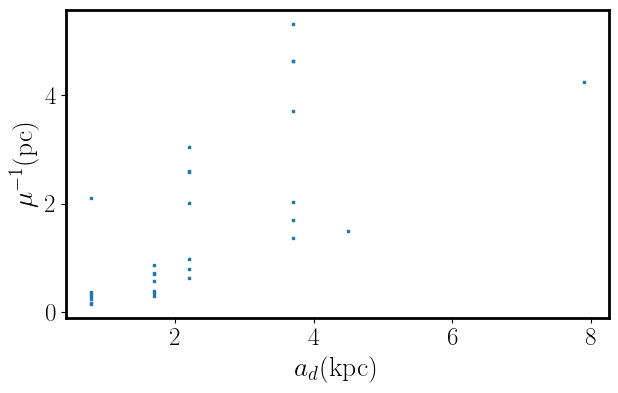

In [3]:
pts.scater(AD,MU2,r'$a_d$(kpc)',r'$\mu^{-1}$(pc)','')

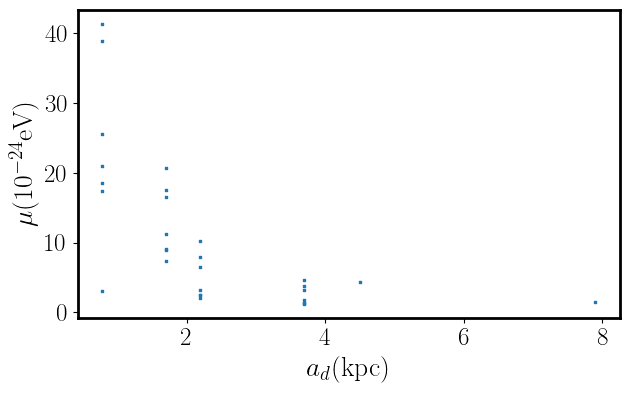

In [4]:
pts.scater(AD,MU,r'$a_d$(kpc)',r'$\mu$($10^{-24}$eV)','')

In [5]:
MU = np.array(MU)
DMU = np.array(DMU)
NCOR = np.array(NCOR)

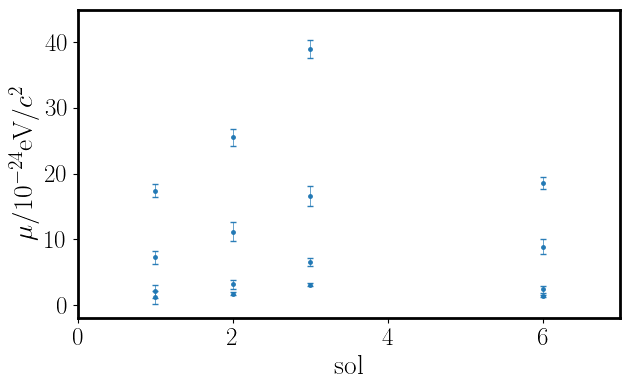

In [6]:
pts.scater(NCOR,MU,'sol',r'$\mu/10^{-24}$eV/$c^2$','',ylim=(0,0),xlim=(0,7),
           errorbar= True, yerr= DMU, initialview=[45,-60],
           name = '', dpi = 250, save = True, s = 1.)

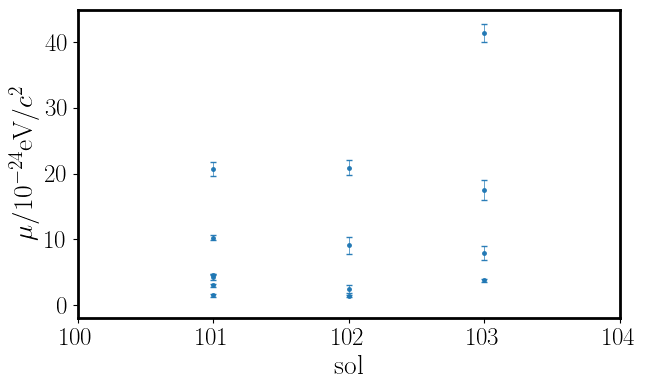

In [7]:
pts.scater(NCOR,MU,'sol',r'$\mu/10^{-24}$eV/$c^2$','',ylim=(0,0),xlim=(100,104),
           errorbar= True, yerr= DMU, save = True, s = 1.)

In [8]:
BMU = []
BDMU = []
dirfits = '/home/jordi/The_universal_rotation_curve_of_dwarf_disk_galaxies/Fits/'
nsol = 102
pars = np.load('%spopt_nsol%d_multi.npy'%(dirfits, nsol))
BMU.append(pars[0])

In [9]:
sig = np.load('%sunsigma_nsol%d_multi.npy'%(dirfits, nsol))
BDMU.append(sig[0])

In [10]:
for nbin in range(1,6):
    dirfits = '/home/jordi/LSB_galaxies/URC/Fits/bin%d/'%nbin
    if nbin == 1:
        ncor = 102
    elif nbin == 2:
        ncor = 3
    elif nbin ==3:
        ncor = 103
    else:
        ncor = 101 
    pars = np.load('%spopt_nsol%d_MCMC_vbin%d.npy'%(dirfits, ncor, nbin))
    BMU.append(pars[0])
    sig = np.load('%sunsigma_nsol%d_MCMC_vbin%d.npy'%(dirfits, ncor, nbin))
    BDMU.append(sig[0])

In [11]:
BMU

[3272.2193989993193,
 1427.4919650179827,
 1025.464431214366,
 591.3080483728213,
 671.269474575425,
 235.62889062554896]

In [12]:
BDMU

[184.6707583219254,
 200.5543696514186,
 92.15447369009479,
 34.91617691655654,
 74.45570612702176,
 27.7985381770646]

In [13]:
num = BMU[0]/(2.*BDMU[0]**2) + BMU[1]/(2.*BDMU[1]**2) + BMU[2]/(2.*BDMU[2]**2) + BMU[3]/(2.*BDMU[3]**2) + BMU[4]/(2.*BDMU[4]**2) + BMU[5]/(2.*BDMU[5]**2)
den = 1./(2.*BDMU[0]**2) + 1./(2.*BDMU[1]**2) + 1./(2.*BDMU[2]**2) + 1./(2.*BDMU[3]**2) + 1./(2.*BDMU[4]**2) + 1./(2.*BDMU[5]**2) 
mean = num/den
mean * hc

3.0154100253322907e-24

In [14]:
den2 = 1./(BDMU[0]**2) + 1./(BDMU[1]**2) + 1./(BDMU[2]**2) + 1./(BDMU[3]**2) + 1./(BDMU[4]**2) + 1./(BDMU[5]**2)
sigma = 1./den2
sigma*hc

2.592298631889745e-24

In [15]:
mean * hc - sigma*hc


4.2311139344254565e-25

In [16]:
mean * hc + sigma*hc

5.607708657222036e-24